# Graph Powered Machine Learning - Exercise 1

Group (2 Person)

Full Name: Shreyas Srinivasa, Harsh Rajesh Parikh

Student Affiliation: AAU

Email Address: shsr@es.aau.dk, hrp@et.aau.dk

Thanks to Martin Fejrskov Andersen for the assistance on the shortest path task :)

# 1.1  Create an RDF Graph representing the same road network and traveltimes

In [ ]:
%%capture
!pip3 install rdflib
!pip3 install networkx

In [ ]:
import rdflib
from rdflib import Graph
from rdflib.namespace import DC, RDF, FOAF, RDFS
from rdflib import URIRef, BNode, Literal
import networkx

In [ ]:

connections = [
    ( "Inverness", "Aberdeen", 3, 2.5 ),
    ( "Aberdeen", "Leuchars", 1.5, 1 ),
    ( "Leuchars", "Edinburgh", 1.5, 3 ),
    ( "Edinburgh", "Glasgow", 1, 1 ),
    ( "Edinburgh", "York", 3.5, 4 ),
    ( "Glasgow", "Carlisle", 1, 1 ),
    ( "Carlisle", "York", 2.5, 3.5 ),
    ( "Carlisle", "Birmingham", 2.0, 1 ),
    ( "Birmingham", "London", 1.5, 2.5 ),
    ( "Leuchars", "StAndrews", 0.2, 0.2 ),
    ( "York", "London", 1.8, 2.0 ),
    ( "London", "Brussels", 2.5, 3.5 ),
    ( "Brussels", "Cologne", 2, 1.5 ),
    ( "Toronto", "Winnipeg", 36, 35 ),
    ( "Winnipeg", "Saskatoon", 12, 5 ),
    ( "Saskatoon", "Edmonton", 12, 17 ),
    ( "Edmonton", "Jasper", 6, 5 ),
    ( "Jasper", "Vancouver", 12, 13 )
]

cities = [
    "Inverness",
    "Aberdeen",
    "Leuchars",
    "StAndrews",
    "Edinburgh",
    "Glasgow",
    "York",
    "Cologne",
    "Carlisle",
    "Birmingham",
    "London",
    "Brussels",
    "Toronto",
    "Winnipeg",
    "Saskatoon",
    "Edmonton",
    "Jasper",
    "Vancouver"
];


g = Graph()
g.bind("foaf", FOAF)

for city1, city2, time1, time2  in connections:
    #Forward
    citynode=URIRef(city1)
    g.add( (citynode, RDF.type, FOAF.Person) )
    g.add( (citynode, FOAF.name, Literal(city1)) )
    g.add( (citynode, FOAF.knows, URIRef(city2)) )
    g.add( (citynode, FOAF.age, Literal(time1) ) )
    #Return
    citynode=URIRef(city2)
    g.add( (citynode, RDF.type, FOAF.Person) )
    g.add( (citynode, FOAF.name, Literal(city2)) )
    g.add( (citynode, FOAF.knows, URIRef(city1)) )
    g.add( (citynode, FOAF.age, Literal(time2) ) )

for s, p, o in g:
   print((s, p, o))

# 1.2 Implement a SPARQL query returning all cities which can be reached from London.

In [ ]:
print("Reachable from London:")

result = g.query(
  """PREFIX  foaf: <http://xmlns.com/foaf/0.1/>
  SELECT ?dest WHERE
  {
   ?x foaf:name "London" .
   ?x foaf:knows+ ?y .
   ?y foaf:name ?dest .
  } """)

for row in result:
    print("%s" % row)

Reachable from London:
Brussels
London
Cologne
York
Carlisle
Glasgow
Edinburgh
Leuchars
StAndrews
Aberdeen
Inverness
Birmingham


# 1.3 Implement generic python code (i.e., the algorithms don't have to be specied in SPARQL, but could be) for the Single Source Shortest Path algorithm and return the shortest paths to all other cities starting from London. You can choose either Dijkstra's or Bellman-Ford's algorithm.

In [ ]:
origincity="London"
for destinationcity in cities:
    #print("*Destination city is now: "+destinationcity)
    
    #init
    unvisitedcities = cities.copy()
    currentcity=origincity
    shortestPath = {}
    for i in unvisitedcities:
      shortestPath[i]=1000
      shortestPath[origincity]=0;
      citiesthatarereachableremain=True
    
    #Continue until we've seen the best path to the destination
    while destinationcity in unvisitedcities:
        #print("Current city is now: "+currentcity)

        #mark current city as visited
        unvisitedcities.remove(currentcity)
        
        #find neighbour nodes
        neighbours = {}
        for city1, city2, time1, time2  in connections:
            if city1 == currentcity:
                neighbours[city2] = time1
            if city2 == currentcity:
                neighbours[city1] = time2
        #update neighbours
        for n,c in neighbours.items():
            if n in unvisitedcities:
                lenghtthroughcurrentcity = shortestPath[currentcity]+c
                if shortestPath[n] > lenghtthroughcurrentcity:
                    #print("Updating "+n+" with distance "+str(lenghtthroughcurrentcity))
                    shortestPath[n] = lenghtthroughcurrentcity
        
        #Go to next city, break of the rest of the graph can't be reached
        nextcitydistance = 1000
        for u in unvisitedcities:
            if shortestPath[u] < nextcitydistance:
                nextcitydistance = shortestPath[u]
                nextcity = u            
        if nextcitydistance == 1000:
            break               
        currentcity=nextcity

    #conclude
    if shortestPath[destinationcity] < 1000:
        print("Shortest path from "+origincity+" to "+destinationcity+" is "+str(shortestPath[destinationcity]))

Shortest path from London to Inverness is 12.0
Shortest path from London to Aberdeen is 9.5
Shortest path from London to Leuchars is 8.5
Shortest path from London to StAndrews is 8.7
Shortest path from London to Edinburgh is 5.5
Shortest path from London to Glasgow is 4.5
Shortest path from London to York is 2.0
Shortest path from London to Cologne is 4.5
Shortest path from London to Carlisle is 3.5
Shortest path from London to Birmingham is 2.5
Shortest path from London to London is 0
Shortest path from London to Brussels is 2.5


# 2.0 Pagerank
For a given directed networkx Graph (e.g., G = nx.DiGraph(nx.path graph(4))  write a PageRank algorithm using python from scratch (i.e., don't use nx.pagerank()).
Your PageRank algorithm should consider a parameter alpha, representing
the damping factor and return a dictionary of nodes with their PageRank as
value.

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse import csc_matrix

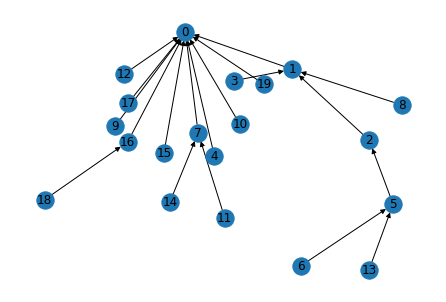

Pagerank:
{0: 0.3402176997524795, 1: 0.12079205242348792, 2: 0.07235592519110112, 3: 0.02195928590546635, 4: 0.02195928590546635, 5: 0.059289870801467484, 6: 0.02195928590546635, 7: 0.05928987080146749, 8: 0.02195928590546635, 9: 0.02195928590546635, 10: 0.02195928590546635, 11: 0.02195928590546635, 12: 0.02195928590546635, 13: 0.02195928590546635, 14: 0.02195928590546635, 15: 0.02195928590546635, 16: 0.040624578353466924, 17: 0.02195928590546635, 18: 0.02195928590546635, 19: 0.02195928590546635}


In [ ]:
def pageRank(G, alpha = .85, maxerr = .0001):

    
    """
    Computes the pagerank for each of the n states
    Parameters
    ----------
    G: matrix representing state transitions
    alpha: damping factor 
    maxerr: if the sum of pageranks between iterations is below this we will
            have converged.
    """

   
    #Constructing a numpy array from the graph and shaping it
    G = nx.to_numpy_matrix(G)
    n = G.shape[0]

    # transform G into markov matrix M
    M = csc_matrix(G,dtype=np.float)
    rsums = np.array(M.sum(1))[:,0]
    ri, ci = M.nonzero()
    M.data /= rsums[ri]

    # bool array of sink states
    sink = rsums==0

    # Compute pagerank "r" until we converge
    ro, r = np.zeros(n), np.ones(n)
    while np.sum(np.abs(r-ro)) > maxerr:
        ro = r.copy()
        # calculate each pagerank at a time
        for i in range(0,n):
            # inlinks of state i
            Mi = np.array(M[:,i].todense())[:,0]
            # Account for sink states
            Di = sink / float(n)
            # Account for teleportation to state i
            Ei = np.ones(n) / float(n)

            r[i] = ro.dot( Mi*alpha + Di*alpha + Ei*(1-alpha) )

    # return normalized pagerank
    return r/float(sum(r))
    

if __name__ == '__main__':
    
    
    """
    Generating a random directed graph G
    """
    
    # setting the number of nodes
    nodes = 20
    
    #G = nx.gn_graph(nodes)
    G = nx.gnr_graph(nodes, 0.5)
   
    nx.draw(G, with_labels = True)
    plt.show()
    
    
    
    """
    computing pagerank
    """
    score = pageRank(G, 0.85, .0001)
     
    rank = {}
    
    
print("Pagerank:")

for i in range(0,nodes):
  rank[i] = score[i]
print(rank)